In [12]:
# Import library that used in this program
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import AdaBoostClassifier #AdaBoost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import xgboost as xgb #XgBoost
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# import imblearn
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('/content/creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [19]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df.shape

(284807, 31)

In [9]:
# Separate Atribut And Features
X, y = df.iloc[:, :-1], df.iloc[:, [-1]]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
decisionTree_model = DecisionTreeClassifier(random_state=43)
decisionTree_model.fit(X_train,y_train)
y_pred_decisionTree = decisionTree_model.predict(X_test)

In [57]:
print(f"akurasi Model  Decision Tree: {metrics.accuracy_score(y_test, y_pred_decisionTree)}")

akurasi Model  Decision Tree: 0.9992392589211521


In [16]:
print(classification_report(y_test, y_pred_decisionTree,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.81      0.73      0.77       147

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [25]:
data_fraud = df[df['Class'] == 1]
data_fraud.shape

(492, 31)

In [22]:
data_fraud.head()

Time        V1        V2        V3        V4        V5        V6  \
541    406.0 -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
623    472.0 -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
4920  4462.0 -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
6108  6986.0 -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
6329  7519.0  1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   

            V7        V8        V9  ...       V21       V22       V23  \
541  -2.537387  1.391657 -2.770089  ...  0.517232 -0.035049 -0.465211   
623   0.325574 -0.067794 -0.270953  ...  0.661696  0.435477  1.375966   
4920  0.562320 -0.399147 -0.238253  ... -0.294166 -0.932391  0.172726   
6108 -3.496197 -0.248778 -0.247768  ...  0.573574  0.176968 -0.436207   
6329  1.713445 -0.496358 -1.282858  ... -0.379068 -0.704181 -0.656805   

           V24       V25       V26       V27       V28  Amount  Class  
541   0.320198  0.044519  0.177840  0.261145 -0.143276    0.00      1  
623  -0.293803  0.279798 -0.145362 -0.252773  0.035764  529.00      1  
4920 -0.087330 -0.156114 -0.542628  0.039566 -0.153029  239.93      1  
6108 -0.053502  0.252405 -0.657488 -0.827136  0.849573   59.00      1  
6329 -1.632653  1.488901  0.566797 -0.010016  0.146793    1.00      1  

[5 rows x 31 columns]

In [39]:
# Test Only with data fraud
X_fraud= data_fraud.iloc[:, :-1]

In [40]:
y_pred_decisionTree_onlyFraud = decisionTree_model.predict(X_fraud)

In [41]:
X_fraud.shape

(492, 30)

In [42]:
import numpy as np

In [45]:
count = np.count_nonzero(y_pred_decisionTree_onlyFraud == 1)

In [47]:
count

453

In [49]:
# Implementasi SMOTE
# from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [54]:
decisionTree_model = DecisionTreeClassifier(random_state=43)
decisionTree_model.fit(X_train_res,y_train_res)
y_pred_decisionTree_res = decisionTree_model.predict(X_test)

In [58]:
print(f"akurasi Model  Decision Tree: {metrics.accuracy_score(y_test, y_pred_decisionTree)}")
print(f"akurasi Model  Decision Tree(SMOTE): {metrics.accuracy_score(y_test, y_pred_decisionTree_res)}")

akurasi Model  Decision Tree: 0.9992392589211521
akurasi Model  Decision Tree(SMOTE): 0.9978816286881312


In [ ]:
# Hasil Akurasi Model
# 0.9978816286881312 #SMOTE
# 0.9992392589211521 #Tanpa SMOTE 

In [75]:
# Clustering Data
from sklearn.cluster import KMeans
import seaborn as sns

In [76]:
X

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V20       V21  \
0       0.462388  0.239599  0.098698  0.363787  ...  0.251412 -0.018307   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.069083 -0.225775   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.524980  0.247998   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.208038 -0.108300   
4       0.095921  0.592941 -0.270533  0.817739  ...  0.408542 -0.009431   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  1.475829  0.213454   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.059616  0.214205   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.001396  0.232045   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.127434  0.265245   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.382948  0.261057   

             V22       V23       V24       V25       V26       V27       V28  \
0       0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1      -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2       0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3       0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4       0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   
...          ...       ...       ...       ...       ...       ...       ...   
284802  0.111864  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731   
284803  0.924384  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   
284804  0.578229 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   
284805  0.800049 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   
284806  0.643078  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649   

        Amount  
0       149.62  
1         2.69  
2       378.66  
3       123.50  
4        69.99  
...        ...  
284802    0.77  
284803   24.79  
284804   67.88  
284805   10.00  
284806  217.00  

[284807 rows x 30 columns]

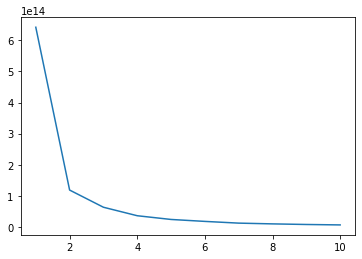

In [74]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(X)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [64]:
KMeans = KMeans(n_clusters=2)

In [65]:
label = KMeans.fit_predict(X)

In [66]:
label

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

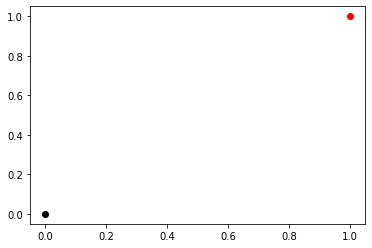

In [70]:


#filter rows of original data
filtered_label2 = 1
 
filtered_label8 = 0 
#Plotting the results
plt.scatter(filtered_label2, filtered_label2 , color = 'red')
plt.scatter(filtered_label8 , filtered_label8 , color = 'black')
plt.show()